Vendors data:
Columns: ['vendor_id', 'vendor_name', 'quality_rating', 'reliability_rating']


,vendor_id,vendor_name,quality_rating,reliability_rating
0,1,Alpha Supplies,3.49,3.57
1,2,Beta Traders,2.93,2.26
2,3,Gamma Distributors,1.94,1.89
3,4,Delta Wholesale,3.62,3.57



Purchase orders data:
Columns: ['order_id', 'vendor_id', 'cost', 'delivery_days']


,order_id,vendor_id,cost,delivery_days
0,1,3,2575.09,3
1,2,4,1148.62,8
2,3,3,1762.28,8
3,4,4,3537.53,5
4,5,2,4454.24,5


Performance by vendor:


,vendor_id,vendor_name,order_count,total_spend,avg_delivery_days,quality_rating,reliability_rating
0,1,Alpha Supplies,9,24403.14,9.777778,3.49,3.57
1,2,Beta Traders,9,30746.06,9.444444,2.93,2.26
2,3,Gamma Distributors,13,35982.46,9.384615,1.94,1.89
3,4,Delta Wholesale,19,54616.31,7.421053,3.62,3.57


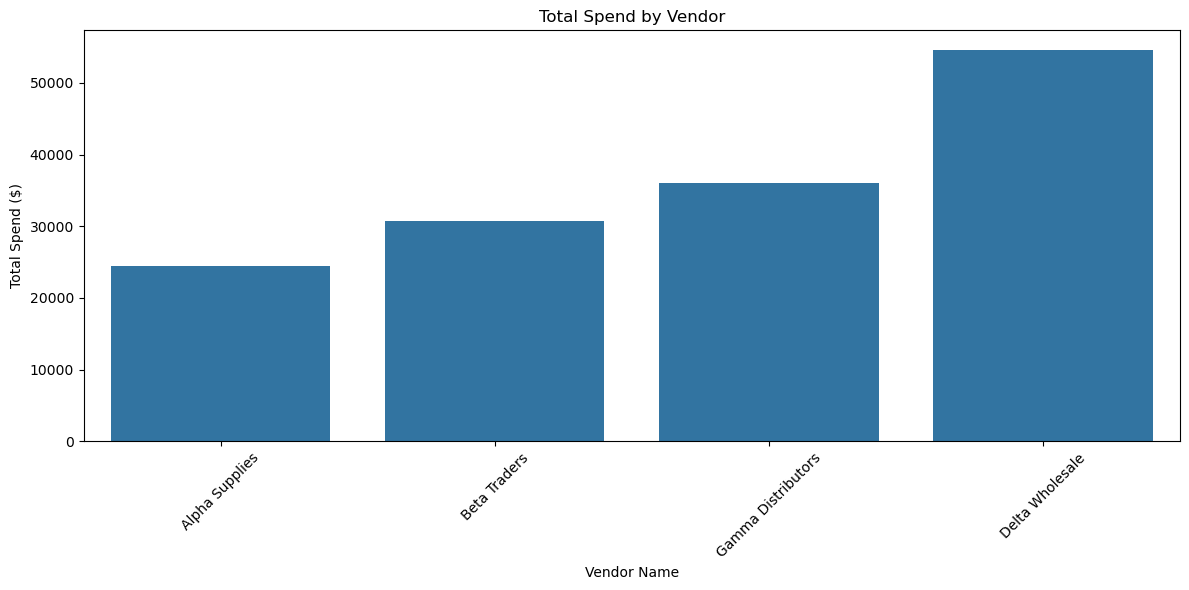

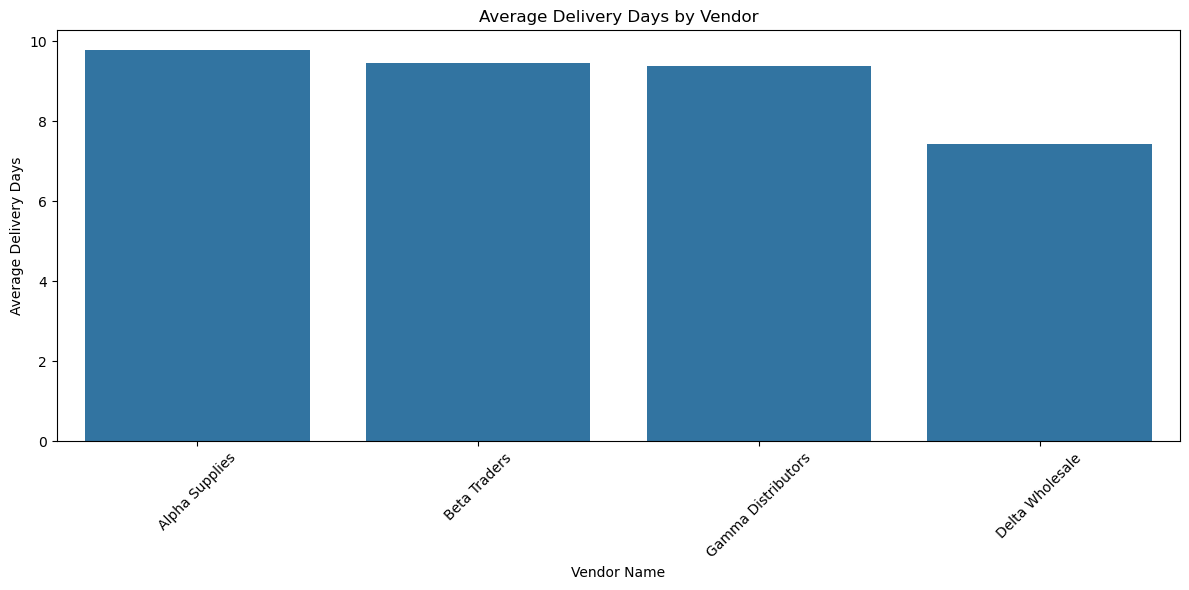

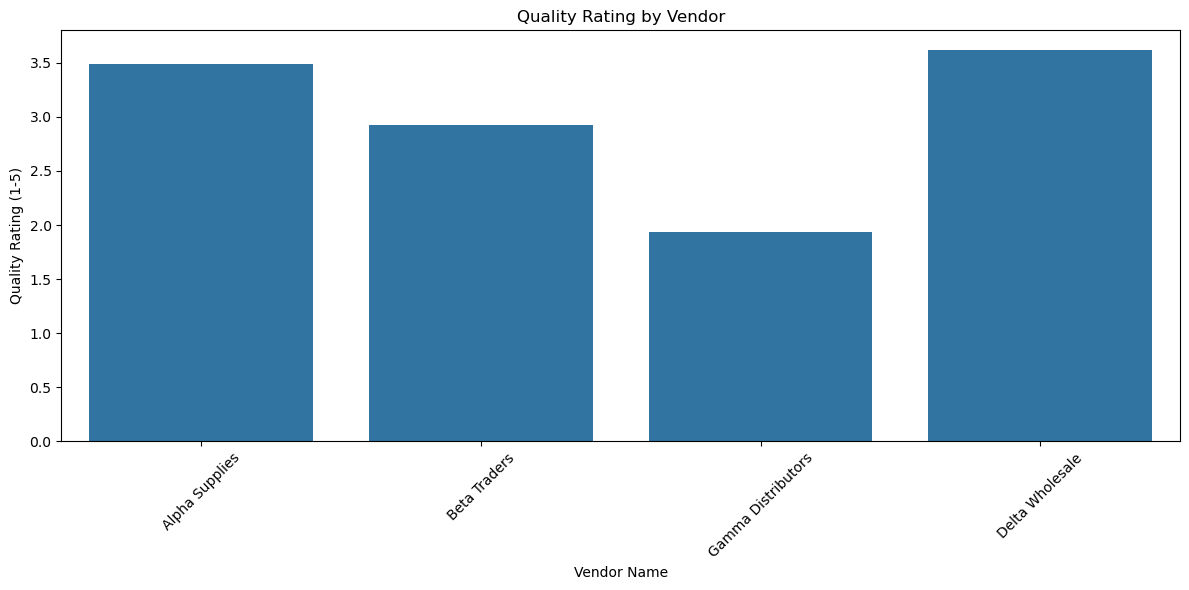

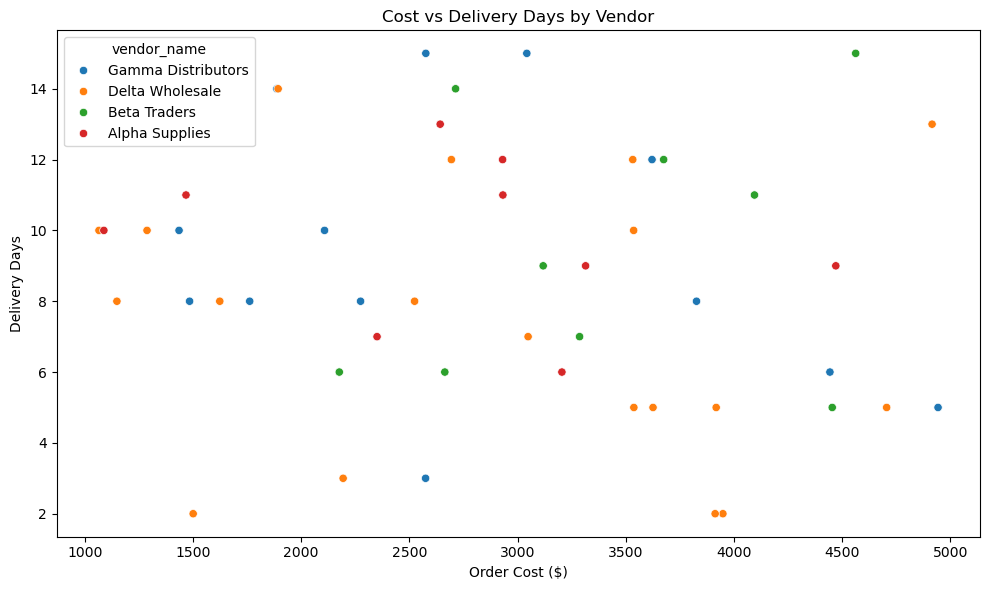

In [6]:
# In a Jupyter Notebook cell - FIXED VERSION
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Connect to database
conn = sqlite3.connect(r'C:\Users\Poorvi\Desktop\vendoe-analysis\data\sample_data.db')

# Load and preview data
vendors_df = pd.read_sql_query("SELECT * FROM vendors", conn)
orders_df = pd.read_sql_query("SELECT * FROM purchase_orders", conn)

print("Vendors data:")
print("Columns:", vendors_df.columns.tolist())
display(vendors_df.head())

print("\nPurchase orders data:")
print("Columns:", orders_df.columns.tolist())
display(orders_df.head())

# Basic analysis - FIXED: Using actual column names
merged_df = orders_df.merge(vendors_df, on='vendor_id')

# Since there's no category, let's analyze by vendor instead
performance_by_vendor = merged_df.groupby(['vendor_id', 'vendor_name']).agg({
    'order_id': 'count',
    'cost': 'sum',
    'delivery_days': 'mean',
    'quality_rating': 'mean',
    'reliability_rating': 'mean'
}).rename(columns={
    'order_id': 'order_count', 
    'cost': 'total_spend',
    'delivery_days': 'avg_delivery_days'
}).reset_index()

print("Performance by vendor:")
display(performance_by_vendor)

# Visualization - Total Spend by Vendor
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_vendor, x='vendor_name', y='total_spend')
plt.title('Total Spend by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Total Spend ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization - Delivery Performance
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_vendor, x='vendor_name', y='avg_delivery_days')
plt.title('Average Delivery Days by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Average Delivery Days')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualization - Quality Ratings
plt.figure(figsize=(12, 6))
sns.barplot(data=performance_by_vendor, x='vendor_name', y='quality_rating')
plt.title('Quality Rating by Vendor')
plt.xlabel('Vendor Name')
plt.ylabel('Quality Rating (1-5)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Additional analysis: Cost vs Delivery Time
plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df, x='cost', y='delivery_days', hue='vendor_name')
plt.title('Cost vs Delivery Days by Vendor')
plt.xlabel('Order Cost ($)')
plt.ylabel('Delivery Days')
plt.tight_layout()
plt.show()

conn.close()